<a href="https://colab.research.google.com/github/pk142/DSML/blob/main/LoanTap_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_curve, precision_recall_curve, roc_auc_score



In [ ]:
# Step 2: Load the dataset
data = pd.read_csv("logistic_regression.csv")

# Step 3: Exploratory Data Analysis (EDA)
# Check structure and characteristics of the dataset
print(data.head())
print(data.info())

# Check for missing values
print(data.isnull().sum())



   loan_amnt        term  int_rate  installment grade sub_grade  \
0    10000.0   36 months     11.44       329.48     B        B4   
1     8000.0   36 months     11.99       265.68     B        B5   
2    15600.0   36 months     10.49       506.97     B        B3   
3     7200.0   36 months      6.49       220.65     A        A2   
4    24375.0   60 months     17.27       609.33     C        C5   

                 emp_title emp_length home_ownership  annual_inc  ...  \
0                Marketing  10+ years           RENT    117000.0  ...   
1          Credit analyst     4 years       MORTGAGE     65000.0  ...   
2             Statistician   < 1 year           RENT     43057.0  ...   
3          Client Advocate    6 years           RENT     54000.0  ...   
4  Destiny Management Inc.    9 years       MORTGAGE     55000.0  ...   

  open_acc pub_rec revol_bal revol_util total_acc  initial_list_status  \
0     16.0     0.0   36369.0       41.8      25.0                    w   
1     17.0

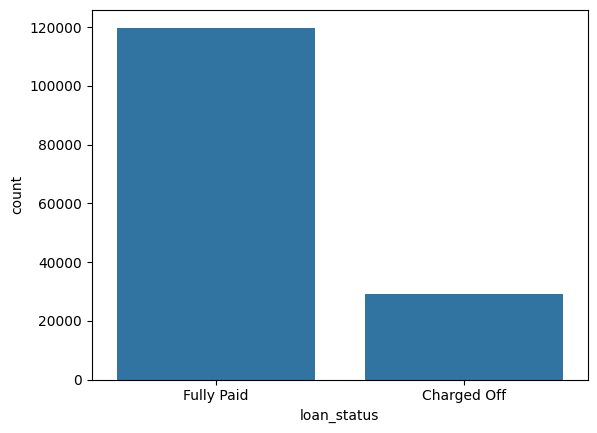

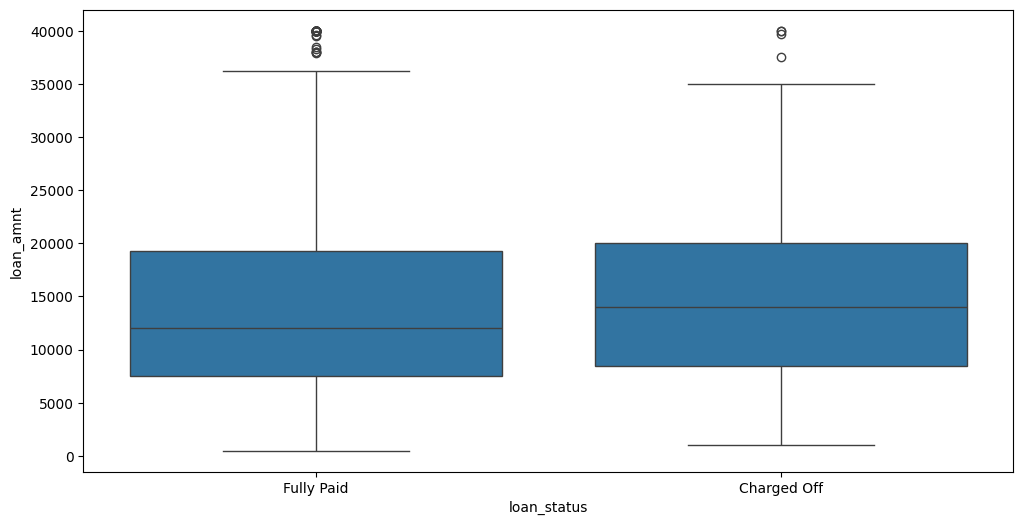

<ipython-input-5-2411b84ebabd>:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm')


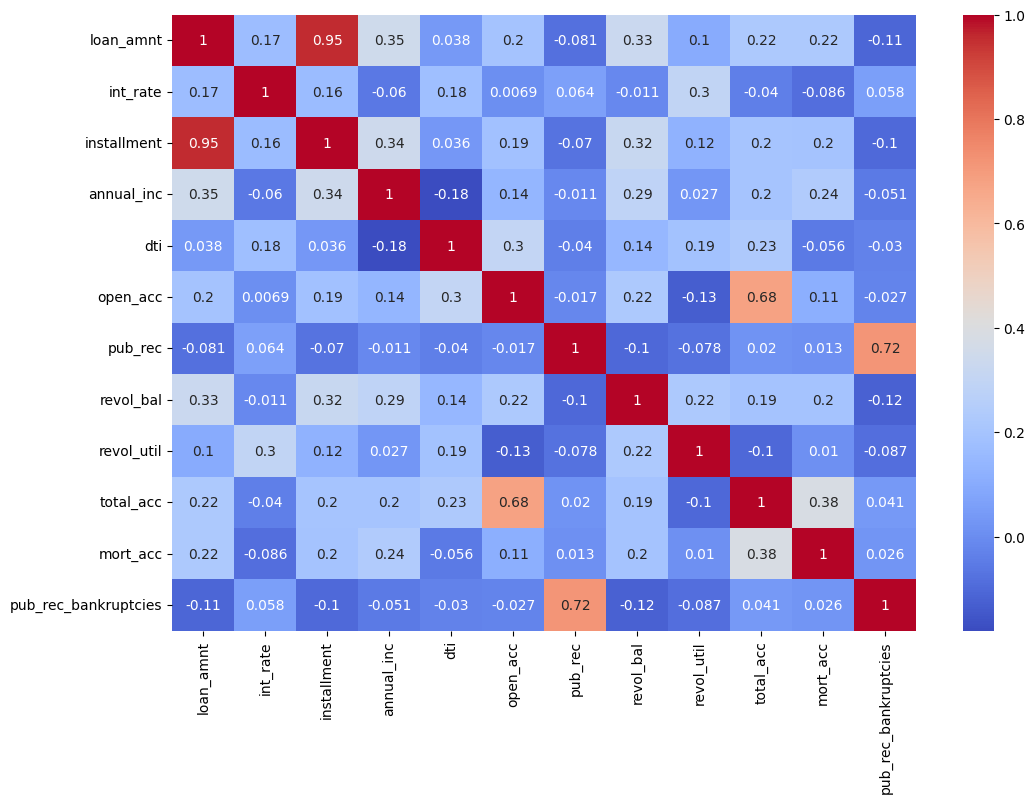

In [ ]:
# Univariate Analysis
sns.countplot(x='loan_status', data=data)
plt.show()

# Bivariate Analysis
plt.figure(figsize=(12, 6))
sns.boxplot(x='loan_status', y='loan_amnt', data=data)
plt.show()

# Check correlation
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()



In [ ]:
# Step 4: Data Preprocessing
# Drop unnecessary columns
#data.drop(['emp_title', 'title', 'address'], axis=1, inplace=True)

# Handle missing values
data['emp_length'].fillna(value=0, inplace=True)  # Assuming NaN values indicate no employment length

# Handle categorical variables
data = pd.get_dummies(data, columns=['grade', 'sub_grade', 'home_ownership', 'verification_status', 'purpose', 'initial_list_status', 'application_type'], drop_first=True)

# Feature Engineering
data['pub_rec_flag'] = np.where(data['pub_rec'] > 0, 1, 0)
data['mort_acc_flag'] = np.where(data['mort_acc'] > 0, 1, 0)
data['pub_rec_bankruptcies_flag'] = np.where(data['pub_rec_bankruptcies'] > 0, 1, 0)

# Drop original columns after feature engineering
data.drop(['pub_rec', 'mort_acc', 'pub_rec_bankruptcies'], axis=1, inplace=True)



In [ ]:
# Split data into features and target variable
X = data.drop('loan_status', axis=1)
y = data['loan_status']



In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Data Preprocessing
# Convert 'term' column to numeric by extracting numerical values
data['term'] = data['term'].apply(lambda x: int(x.split()[0]))



In [ ]:
# Step 6: Results Evaluation
# Predictions
y_pred = model.predict(X_test_scaled)

# Classification Report
print(classification_report(y_test, y_pred))

# ROC AUC Curve
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve')
plt.legend()
plt.show()

# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# Step 7: Actionable Insights & Recommendations
# - Prioritize features like loan amount, installment, and employment length in the underwriting process.
# - Implement rigorous verification processes to minimize defaults.
# - Monitor loan performance continuously and adjust underwriting criteria as needed.
